In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from os import write
import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from ResnetModels import ResNet, ResNet50

In [2]:
def load_history(history_dir):
    data = {}
    with open(history_dir) as infile:
        data = json.load(infile)
    return data
def smooth_data(x, kernel=5):
    ret_val = []
    pad = (kernel - 1) / 2
    pad = int(pad)
    base, append = [0]*pad, [0]*pad
    base.extend(x)
    base.extend(append)
    for i in range(pad, len(base)-pad):
        low, high = i - pad, i + pad + 1
        count = 0
        subsequence = base[low:high]
        for s in subsequence:
            if s > 0:
                count += 1
        s = np.sum(subsequence)
        ret_val.append(s/count)
    return ret_val

In [3]:
orig_data = load_history('results/resnet50_no_l2_100eps.json')
data = load_history('results/resnet50_no_l2_sch.json')

In [14]:
print(data.keys())

dict_keys(['loss', 'acc'])


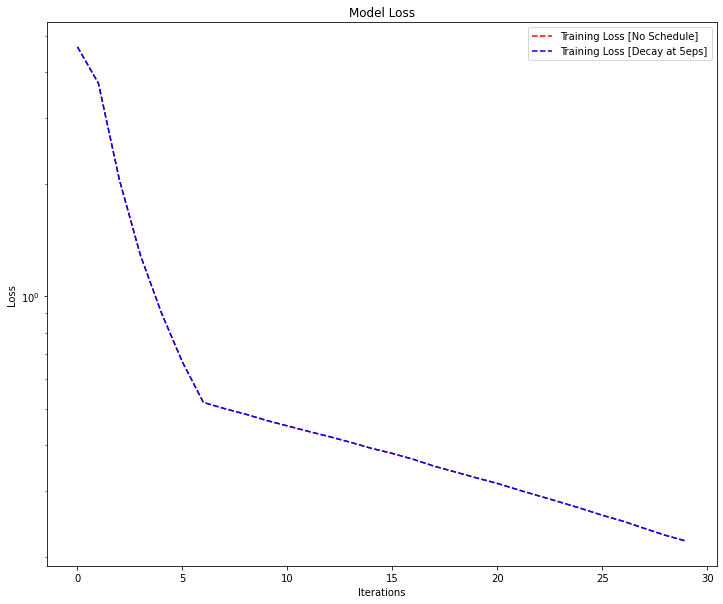

In [16]:
plot_data = smooth_data(data['loss']['train'], kernel=1)[0:30]
test_data = smooth_data(orig_data['loss']['train'], kernel=1)[0:30]
num_points = len(plot_data)
plt.figure(figsize=(12, 10))
plt.title('Model Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.yscale('log')
plt.plot(range(num_points), plot_data, 'r--', label='Training Loss [No Schedule]')
plt.plot(range(num_points), plot_data, 'b--', label='Training Loss [Decay at 5eps]')
plt.legend()
plt.show()

[0.007021360759493671, 0.4920886075949367, 0.6683148734177216, 0.7305181962025317, 0.7622626582278481, 0.7827333860759493, 0.7841178797468354, 0.7875791139240507, 0.7845134493670886, 0.7872824367088608, 0.7880735759493671, 0.7910403481012658, 0.790743670886076, 0.7887658227848101, 0.7910403481012658, 0.7910403481012658, 0.7895569620253164, 0.7919303797468354, 0.7934137658227848, 0.7959849683544303, 0.7924248417721519, 0.794501582278481, 0.795193829113924, 0.7974683544303798, 0.7971716772151899, 0.7988528481012658, 0.797567246835443, 0.7982594936708861, 0.799248417721519, 0.7977650316455697]


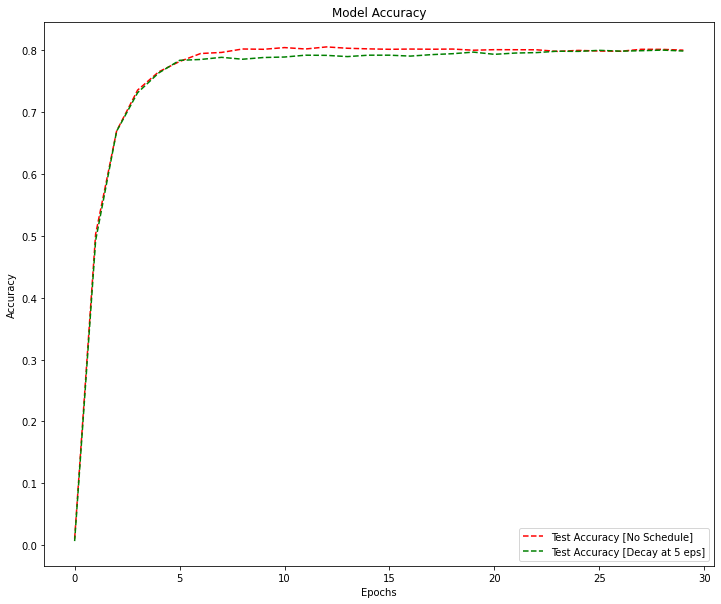

In [4]:
# train_acc = data['acc']['train'][0:30]
test_acc = data['acc']['test'][0:30]
test_acc_orig = orig_data['acc']['test'][0:30]
print(test_acc)
num_points = len(test_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(range(num_points), test_acc_orig, 'r--', label='Test Accuracy [No Schedule]')
plt.plot(range(num_points), test_acc, 'g--', label='Test Accuracy [Decay at 5 eps]')
plt.legend()
plt.show()

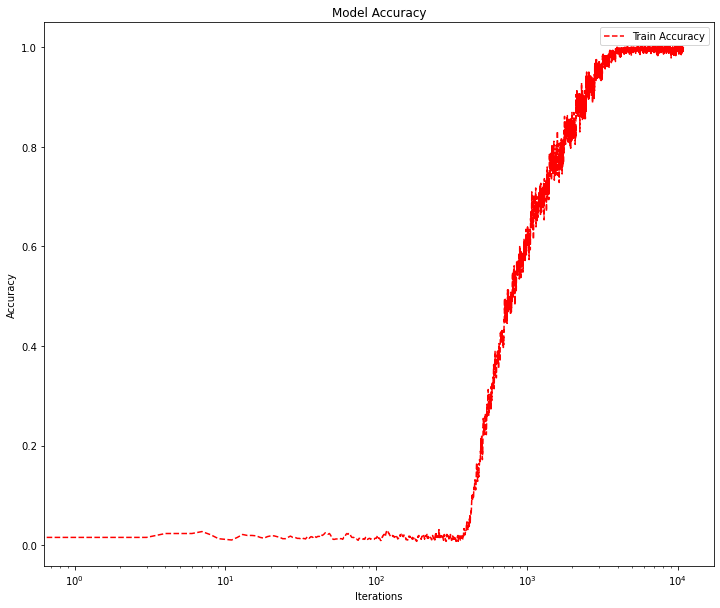

In [21]:
train_acc = smooth_data(data['acc']['train_iter'])
num_train = len(train_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.plot(range(num_train), train_acc, 'r--', label='Train Accuracy')
plt.xscale('log')
plt.legend()
plt.show()

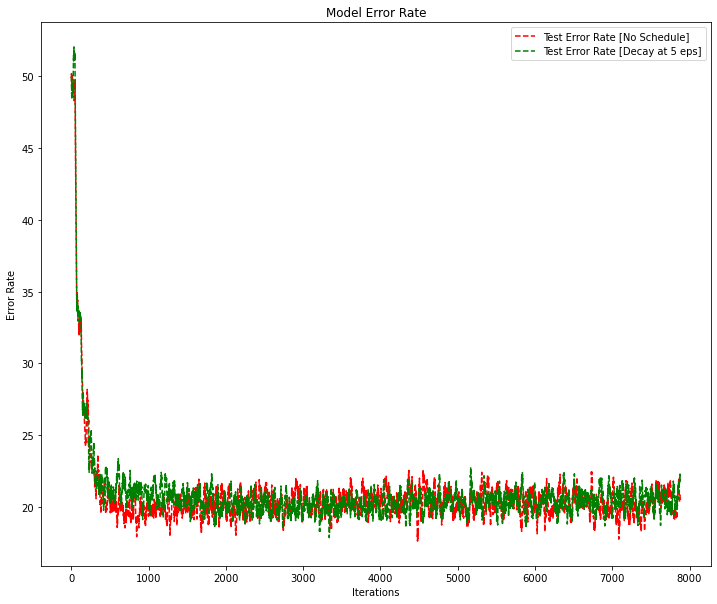

In [9]:
# train_acc = data['acc']['train'][0:30]
test_acc = smooth_data((1-np.array(data['acc']['test_iter'][100:10000]))*100, kernel=23)
test_acc_orig = smooth_data((1-np.array(orig_data['acc']['test_iter'][100:10000]))*100, kernel=23)
num_points = len(test_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Error Rate')
plt.xlabel('Iterations')
plt.ylabel('Error Rate')
plt.plot(range(num_points), test_acc_orig, 'r--', label='Test Error Rate [No Schedule]')
plt.plot(range(num_points), test_acc, 'g--', label='Test Error Rate [Decay at 5 eps]')
plt.legend()
plt.show()

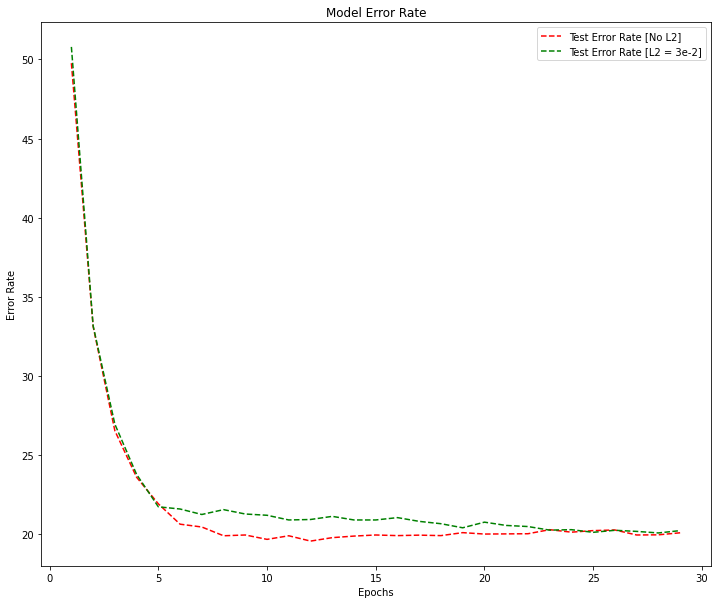

In [7]:
# train_acc = data['acc']['train'][0:30]
start_point = 1
end_point = 30
test_acc = smooth_data((1-np.array(data['acc']['test'][start_point:end_point]))*100, kernel=1)
test_acc_orig = smooth_data((1-np.array(orig_data['acc']['test'][start_point:end_point]))*100, kernel=1)
#test_acc = (1-np.array(data['acc']['test'][start_point:end_point]))*100
#test_acc_orig = (1-np.array(orig_data['acc']['test'][start_point:end_point]))*100
num_points = len(test_acc)
plt.figure(figsize=(12, 10))
plt.title('Model Error Rate')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.plot(range(start_point, end_point), test_acc_orig, 'r--', label='Test Error Rate [No L2]')
plt.plot(range(start_point, end_point), test_acc, 'g--', label='Test Error Rate [L2 = 3e-2]')
plt.legend()
plt.show()